## Шаг №1. Предобработка данных.

<font color='magenta'> <b>Комментарий наставника:</b> Привет! Лучше все же оставлять описание проекта. И проверять проще, и потом самому вспоминать - "что это тут такое интересное". И можно отправить как пример своей работы.
    
По проекту - очень хорошо сделанно. Просто и правильно объединены таблицы, отлично посчитана выручка. Экономный хорошо работающий код. Отлично проверяешь гипотезы.

Но! есть недочеты и на этапе предобработки данных, и на этапе выводов. Еще нужно вывести статистические показатели распределений - медиану, среднее, стандартное отклонение. И понять, как меняются наши данные по месяцам. 
</font>

<font color='magenta'> <b>Комментарий наставника 2:</b> Отлично, проект стал еще лучше. Здорово, что теперь ты строишь предположения о том, как именно появились странные нули в данных и дествуешь исходя из этих предположений. Для того, что бы он стал совсем идеальным стоит тип соединения таблиц с left заменить на outer (на всякий случай - мало ли как ты в дальнейшем будешь использовать этот код, хотя в новом варианте ты правильно выстроил порядок соединения таблиц). Ты нашел интересную деталь: данные не по всем 500 пользователям есть в таблицах - хорошо бы изучить, почему. Когда я просила сформировать гипотезы я предлагала написать, в чем именно заключаются нулевая гипотеза и альтернативная - это сильно облегчит работу людям, которые будут использовать твой проект. И еще  - когда у нас есть данные только по одному году мы можем очень осторожно утверждать что-то про "тренды". Все изменения вполне могут быть вызваны простой годовой сезонностью. Для вычисления именно трендов нужно иметь хоть немного данных и за предыдущий год тоже, либо выражаться острожней. 
</font>

### Изучим файлы данных.

In [1]:
import pandas as pd
import math
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
data_users = pd.read_csv('/datasets/users.csv')

In [2]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB


<b>В датасете есть пропущенные значения в столбце churn_date, это нормально, так как в него вносится дата ухода пользователей, если значение пропущено, то пользователь еще пользуется тарифом.< /b> 

In [3]:
data_calls = pd.read_csv('/datasets/calls.csv')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
data_calls['duration'].value_counts().head()

0.00    39613
4.49      142
5.50      142
6.15      141
6.38      141
Name: duration, dtype: int64

<b>Видим, что у нас 39 тысяч звонков с нулевой длительностью. Возможно это вызовы на которые не ответили или люди не брали трубки. Так как это проблема в данных, то удалим их.</b> 

In [5]:
print(data_calls['user_id'].value_counts().count())
data_calls = data_calls.query('duration != 0')
data_calls['duration'].value_counts().head()
print(data_calls['user_id'].value_counts().count())

492
492


<b>Как видно нулевой длительности звонков больше нет.</b>

<font color='magenta'> <b>Комментарий наставника:</b> Почему именно медиана? Есть предположения, почему возникли пропуски в данных?
</font>

In [6]:
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet.info()
data_internet['mb_used'].value_counts().head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
Name: mb_used, dtype: int64

<b>Видим, что у нас 19 тысяч сессий с нулевой передачей данных. Возможно это сессии в которых была попытка подключения к интернету, но без передачи данных. Так как это проблема в данных, то удалим их.</b> 

In [7]:
print(data_internet['user_id'].value_counts().count())
data_internet = data_internet.query('mb_used != 0')
data_internet['mb_used'].value_counts().head()
print(data_internet['user_id'].value_counts().count())

497
497


<b>Как видно нулевых интернет сессий больше нет.</b>

In [8]:
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.info()
data_messages['message_date'].value_counts().head()
print(data_messages['user_id'].value_counts().count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
426


In [9]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes


<b>В таблицах с данными по сообщениям и интернет траффику с данными все в порядке.</b>

<font color='magenta'> <b>Комментарий наставника:</b> Нужно ли еще где-то заменить нулевые значения?
</font>

## Шаг №2. Добавим новые данные для каждого пользователя.

### Количество сделанных звонков и израсходованных минут разговора по месяцам, количество отправленных сообщений и объем израсходованного интернет траффика.

<b>Для добавления этого столбца нам необходимо для начала привести все столбцы с датами к единому виду.</b>

In [10]:
data_calls['month']= pd.DatetimeIndex(pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')).month

In [11]:
data_internet['month']= pd.DatetimeIndex(pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')).month

In [12]:
data_messages['month']= pd.DatetimeIndex(pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')).month

In [13]:
users_month_calls = data_calls.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
users_month_calls.rename(columns={'id': 'users_month_calls'}, inplace=True)

In [14]:
users_month_calls_duration = data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc='sum')

In [15]:
users_month_messages = data_messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
users_month_messages.rename(columns={'id': 'messages'}, inplace=True)
users_month_messages['messages'].isna().sum()

0

In [16]:
users_month_mb = data_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
users_month_mb['mb_used'].isna().sum()

0

In [17]:
data = users_month_mb.merge(users_month_calls_duration, on=['user_id','month'], how='left')

In [18]:
data = data.merge(users_month_calls, on=['user_id','month'], how='left')

In [19]:
data = data.merge(users_month_messages, on=['user_id','month'], how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3201 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
mb_used              3201 non-null float64
duration             3155 non-null float64
users_month_calls    3155 non-null float64
messages             2704 non-null float64
dtypes: float64(4)
memory usage: 113.5 KB


In [20]:
data = pd.DataFrame(data.to_records())

In [21]:
data_users_id = data_users.loc[:,['user_id','tariff','city']]
data = data.merge(data_users_id, on='user_id', how='left')

<b>Проверим нашу полученную таблицу</b>

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 0 to 3200
Data columns (total 8 columns):
user_id              3201 non-null int64
month                3201 non-null int64
mb_used              3201 non-null float64
duration             3155 non-null float64
users_month_calls    3155 non-null float64
messages             2704 non-null float64
tariff               3201 non-null object
city                 3201 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 225.1+ KB


<b>Заполним пропущенные значения в длине звонков, сообщениях и мегабайтах данных на 0, так как в эти месяцы пользователи могли не отправлять сообщения или уже перестали пользоваться тарифом</b>

In [23]:
data['messages'] = data['messages'].fillna(0)
data['mb_used'] = data['mb_used'].fillna(0)
data['duration'] = data['duration'].fillna(0)
data.info()
print(data['user_id'].value_counts().count())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 0 to 3200
Data columns (total 8 columns):
user_id              3201 non-null int64
month                3201 non-null int64
mb_used              3201 non-null float64
duration             3201 non-null float64
users_month_calls    3155 non-null float64
messages             3201 non-null float64
tariff               3201 non-null object
city                 3201 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 225.1+ KB
497


<b> После всех преобразований получаем датафрейм <strong>data</strong> со всеми необходимыми данными, а именно: 
<ol type= «1″>
<li>Израсходованных минут в месяц</li>
<li>Количество отправленных сообщений в месяц</li>
<li>Объем израсходованного интернет-траффика в месяц</li>
<li>Тариф пользователя</li>
<li>Город пользователя</li>     
</ol>

<font color='magenta'> <b>Комментарий наставника 2:</b> В итоге ты получил, что у тебя 497 пользователей в таблице. Должно быть 500. Пожалуй, стоит выяснить, куда провалились еще 3.
</font>

In [24]:
data.head()

,user_id,month,mb_used,duration,users_month_calls,messages,tariff,city
0,1000,5,2253.49,150.06,17.0,22.0,ultra,Краснодар
1,1000,6,23233.77,158.90,28.0,60.0,ultra,Краснодар
2,1000,7,14003.64,318.80,41.0,75.0,ultra,Краснодар
3,1000,8,14055.93,389.87,42.0,81.0,ultra,Краснодар
4,1000,9,14568.91,440.14,46.0,57.0,ultra,Краснодар


<font color='magenta'> <b>Комментарий наставника:</b> Отличное объединение таблиц! Просто и правильно. Но стоит исследовать итоговую таблицу - все ли объединения прошли корректно, сколько в ней строк, не забыты ли нужные колонки. И я бы не скзаал, что 34 человека ушли именно "от оператора".
</font>

## Доп.вывод
Изменил порядок объединения таблиц, чтобы не потерять некоторых пользователей, которые изначально терялись при объединении с датасетом, где меньше User_id

<font color='magenta'> <b>Комментарий наставника 2:</b> А вот это правильно!
</font>

### Теперь добавим помесячную выручку с каждого пользователя.

In [25]:
data['messages']=data['messages'].astype('int')
data['duration']=data['duration'].astype('int')
data['mb_used']=data['mb_used'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 0 to 3200
Data columns (total 8 columns):
user_id              3201 non-null int64
month                3201 non-null int64
mb_used              3201 non-null int64
duration             3201 non-null int64
users_month_calls    3155 non-null float64
messages             3201 non-null int64
tariff               3201 non-null object
city                 3201 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 225.1+ KB


In [26]:
data_tariffs.head()

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [27]:
def month_revenue_by_user (row):
    tariff = row['tariff']
    if tariff == 'ultra':
        index = 1
    elif tariff == 'smart':
        index = 0
        
    if data_tariffs.loc[index,'messages_included'] < row['messages']:
        message_revenu = (row['messages']-data_tariffs.loc[index,'messages_included'])*data_tariffs.loc[index,'rub_per_message']
    else: message_revenu = 0

    if data_tariffs.loc[index,'mg_per_month_included'] < row['mb_used']:
        mb_revenu = math.ceil((row['mb_used']-data_tariffs.loc[index,'mg_per_month_included'])/1024)*data_tariffs.loc[index,'rub_per_gb']
    else: mb_revenu = 0

    if data_tariffs.loc[index,'minutes_included'] < row['duration']:
        calls_revenu = (row['duration']-data_tariffs.loc[index,'minutes_included'])*data_tariffs.loc[index,'rub_per_minute']
    else: calls_revenu = 0

    revenu = data_tariffs.loc[index,'rub_monthly_fee'] + message_revenu + mb_revenu + calls_revenu
    return revenu
        
data['revenu'] = data.apply(month_revenue_by_user, axis=1)       
data.head()

,user_id,month,mb_used,duration,users_month_calls,messages,tariff,city,revenu
0,1000,5,2253,150,17.0,22,ultra,Краснодар,1950
1,1000,6,23233,158,28.0,60,ultra,Краснодар,1950
2,1000,7,14003,318,41.0,75,ultra,Краснодар,1950
3,1000,8,14055,389,42.0,81,ultra,Краснодар,1950
4,1000,9,14568,440,46.0,57,ultra,Краснодар,1950


<font color='magenta'> <b>Комментарий наставника:</b> Функция просто супер.</font>

## Шаг №3. Проанализируем данные.

<b> Построим гистограммы и опишем распределения.</b>

### Пользователи тарифа Ultra

#### Посмотрим распределение количества пользователей тарифа "Ультра" по минутам разговоров в месяц.

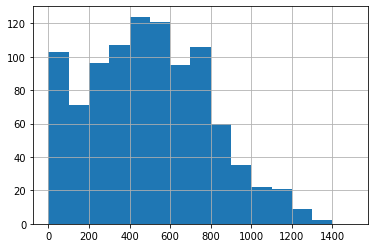

In [28]:
data.query('tariff == "ultra"').loc[:,'duration'].hist(bins=range(data['duration'].min(), data['duration'].max(), 100))

#### Посмотрим распределение количества пользователей тарифа "Ультра" по количеству отправленных сообщений в месяц.

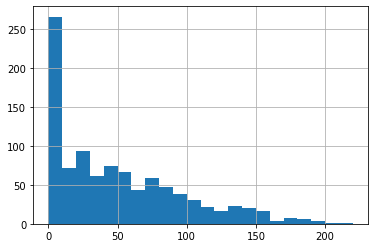

In [29]:
data.query('tariff == "ultra"').loc[:,'messages'].hist(bins=range(data['messages'].min(), data['messages'].max(), 10))

#### Посмотрим распределение количества пользователей тарифа "Ультра" по потраченным мегабайтам в месяц.

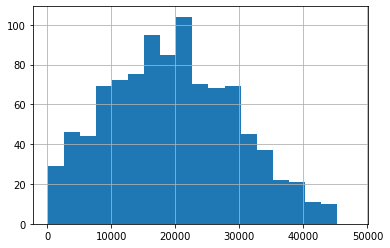

In [30]:
data.query('tariff == "ultra"').loc[:,'mb_used'].hist(bins=range(data['mb_used'].min(), data['mb_used'].max(), 2500))

In [31]:
data.query('tariff == "ultra" and mb_used <= 30720').shape[0]/data.query('tariff == "ultra"').shape[0]

0.8624229979466119

### Пользователи тарифа Smart

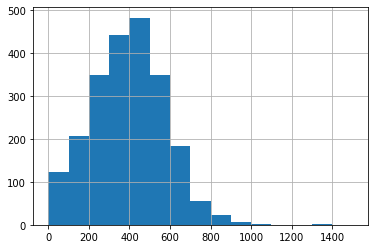

In [32]:
data.query('tariff == "smart"').loc[:,'duration'].hist(bins=range(data['duration'].min(), data['duration'].max(), 100))

In [34]:
data.query('tariff == "smart" and duration <= 500').shape[0]/data.query('tariff == "smart"').shape[0]

0.7211495285136955

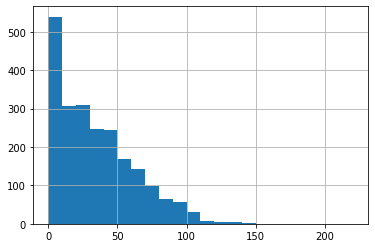

In [35]:
data.query('tariff == "smart"').loc[:,'messages'].hist(bins=range(data['messages'].min(), data['messages'].max(), 10))

In [36]:
data.query('tariff == "smart" and messages <= 50').shape[0]/data.query('tariff == "smart"').shape[0]

0.7467444993264482

#### Посмотрим распределение количества пользователей тарифа "Смарт" по количеству потраченных мб в месяц.

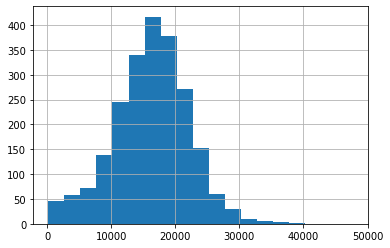

In [37]:
data.query('tariff == "smart"').loc[:,'mb_used'].hist(bins=range(data['mb_used'].min(), data['mb_used'].max(), 2500))

In [38]:
data.query('tariff == "smart" and mb_used <= 15360').shape[0]/data.query('tariff == "smart"').shape[0]

0.4144589133363269

### Пользователи тарифа "Ультра"
<ol type= «1″>
<li>Не договаривают до максимума минут в своем тарифе</li>
<li>Не расходуют все свои сообщения</li>
<li>Большинсто пользователей использует <b>меньше</b> максимума МБ включенных в тариф, примерно <b>87%</b></li>
</ol>

### Пользователи тарифа "Смарт"
<ol type= «1″>
<li>Большинство пользователей договариют до максимума минут <b>72%</b>, только <b>28%</b> говорит больше</li>
<li>Большинство расходуют все свои сообщения, около <b>74%</b></li>
<li>Примерно <b>40%</b> пользователей использует максимуму МБ включенных в тариф, остальные больше максимума</li>
</ol>

<b>Посчитаем среднее количество, дисперсию и стандартное отклонение минут разговоров, сообщений и объема интернет трафика для пользователей каждого тарифа в месяц.</b>

## Посмотрим метрики пользователей тарифа "Ультра" по минутам разговоров в месяц.

In [39]:
data.head()

,user_id,month,mb_used,duration,users_month_calls,messages,tariff,city,revenu
0,1000,5,2253,150,17.0,22,ultra,Краснодар,1950
1,1000,6,23233,158,28.0,60,ultra,Краснодар,1950
2,1000,7,14003,318,41.0,75,ultra,Краснодар,1950
3,1000,8,14055,389,42.0,81,ultra,Краснодар,1950
4,1000,9,14568,440,46.0,57,ultra,Краснодар,1950


In [40]:
mean_ultra = data.query('tariff == "ultra"').pivot_table(index='month', values='duration', aggfunc='mean')
mean_ultra.rename(columns={'duration': 'mean'}, inplace=True)

median_ultra = data.query('tariff == "ultra"').pivot_table(index='month', values='duration', aggfunc='median')
median_ultra.rename(columns={'duration': 'median'}, inplace=True)
mean_ultra = mean_ultra.merge(median_ultra, on='month', how='left')


devation_ultra = data.query('tariff == "ultra"').pivot_table(index='month', values='duration', aggfunc=np.std)
devation_ultra.rename(columns={'duration': 'deviation'}, inplace=True)
ultra = mean_ultra.merge(devation_ultra, on='month', how='left')

ultra

,mean,median,deviation
month,,,
1,404.333333,359.0,254.725833
2,297.545455,156.5,286.588925
3,461.972973,380.0,315.652894
4,431.400000,427.0,253.022148
5,491.307692,492.0,271.157584
6,455.361446,451.0,286.963607
7,517.833333,523.5,290.181936
8,483.830189,474.0,295.634378
9,511.263158,494.0,306.728269


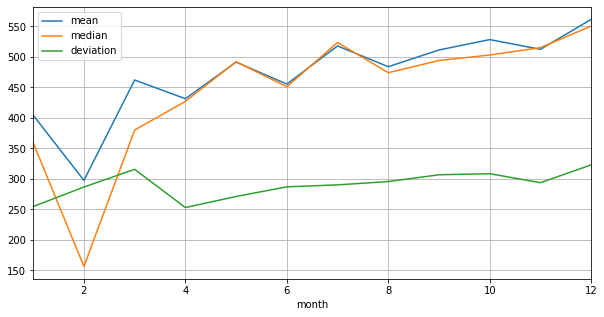

In [40]:
ultra.plot(grid=True,figsize=(10,5))

## Вывод.
<b>По графику видно, что среднее и медана за год выросли и имеют тенденцию к росту дальше.</b>

## Посмотрим метрики пользователей тарифа "Ультра" по сообщениям в месяц.


In [41]:
mean_ultra = data.query('tariff == "ultra"').pivot_table(index='month', values='messages', aggfunc='mean')
mean_ultra.rename(columns={'messages': 'mean'}, inplace=True)

median_ultra = data.query('tariff == "ultra"').pivot_table(index='month', values='messages', aggfunc='median')
median_ultra.rename(columns={'messages': 'median'}, inplace=True)
mean_ultra = mean_ultra.merge(median_ultra, on='month', how='left')


devation_ultra = data.query('tariff == "ultra"').pivot_table(index='month', values='messages', aggfunc=np.std)
devation_ultra.rename(columns={'messages': 'deviation'}, inplace=True)
ultra = mean_ultra.merge(devation_ultra, on='month', how='left')

ultra

,mean,median,deviation
month,,,
1,33.777778,32.0,30.670742
2,23.727273,11.0,27.308087
3,32.297297,20.0,41.621886
4,31.563636,17.0,37.513831
5,38.646154,26.0,40.636895
6,41.771084,27.0,44.836920
7,49.988889,39.0,48.957329
8,48.509434,38.5,46.817629
9,52.464912,44.5,46.564292


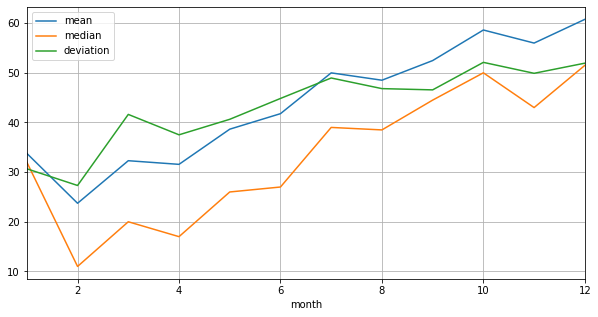

In [42]:
ultra.plot(grid=True,figsize=(10,5))

## Вывод.
<b>По графику видно, что среднее и медана за год выросли и имеют тенденцию к росту дальше.</b>

## Посмотрим метрики пользователей тарифа "Ультра" по интернет траффику в месяц.

In [43]:
mean_ultra = data.query('tariff == "ultra"').pivot_table(index='month', values='mb_used', aggfunc='mean')
mean_ultra.rename(columns={'mb_used': 'mean'}, inplace=True)

median_ultra = data.query('tariff == "ultra"').pivot_table(index='month', values='mb_used', aggfunc='median')
median_ultra.rename(columns={'mb_used': 'median'}, inplace=True)
mean_ultra = mean_ultra.merge(median_ultra, on='month', how='left')


devation_ultra = data.query('tariff == "ultra"').pivot_table(index='month', values='mb_used', aggfunc=np.std)
devation_ultra.rename(columns={'mb_used': 'deviation'}, inplace=True)
ultra = mean_ultra.merge(devation_ultra, on='month', how='left')

ultra

,mean,median,deviation
month,,,
1,13140.333333,14791.0,6865.558699
2,12845.909091,9654.5,10473.549423
3,17535.081081,17495.0,10951.862029
4,16827.636364,16645.0,9718.694942
5,19958.492308,19131.0,9591.693552
6,19152.433735,19660.0,9109.858636
7,20722.888889,20016.0,9883.012348
8,19760.254717,19010.0,10349.871448
9,19372.245614,19951.0,9353.625148


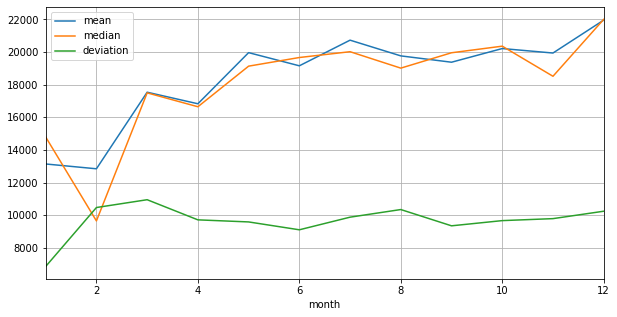

In [44]:
ultra.plot(grid=True,figsize=(10,5))

## Вывод.
<b>По графику видно, что среднее и медана за год выросли и имеют тенденцию к росту дальше.</b>

## Посмотрим метрики пользователей тарифа "Смарт" по минутам разговоров в месяц.

In [45]:
mean_smart = data.query('tariff == "smart"').pivot_table(index='month', values='duration', aggfunc='mean')
mean_smart.rename(columns={'duration': 'mean'}, inplace=True)

median_smart = data.query('tariff == "smart"').pivot_table(index='month', values='duration', aggfunc='median')
median_smart.rename(columns={'duration': 'median'}, inplace=True)
mean_smart = mean_smart.merge(median_smart, on='month', how='left')


devation_smart = data.query('tariff == "smart"').pivot_table(index='month', values='duration', aggfunc=np.std)
devation_smart.rename(columns={'duration': 'deviation'}, inplace=True)
smart = mean_smart.merge(devation_smart, on='month', how='left')

smart

,mean,median,deviation
month,,,
1,192.558824,156.0,146.278728
2,282.413793,242.5,180.973783
3,367.350649,386.0,181.531769
4,345.776786,349.0,176.117421
5,364.709220,407.0,176.560210
6,372.689024,378.0,165.670846
7,385.004975,388.0,169.742879
8,398.876068,408.5,175.331365
9,404.019231,409.5,173.281467


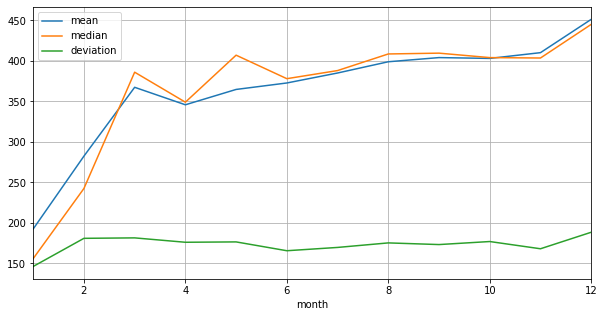

In [46]:
smart.plot(grid=True,figsize=(10,5))

## Вывод.
<b>По графику видно, что среднее и медана за год выросли и имеют тенденцию к росту дальше.</b>

## Посмотрим метрики пользователей тарифа "Смарт" по сообщениям в месяц.

In [47]:
mean_smart = data.query('tariff == "smart"').pivot_table(index='month', values='messages', aggfunc='mean')
mean_smart.rename(columns={'messages': 'mean'}, inplace=True)

median_smart = data.query('tariff == "smart"').pivot_table(index='month', values='messages', aggfunc='median')
median_smart.rename(columns={'messages': 'median'}, inplace=True)
mean_smart = mean_smart.merge(median_smart, on='month', how='left')


devation_smart = data.query('tariff == "smart"').pivot_table(index='month', values='messages', aggfunc=np.std)
devation_smart.rename(columns={'messages': 'deviation'}, inplace=True)
smart = mean_smart.merge(devation_smart, on='month', how='left')

smart

,mean,median,deviation
month,,,
1,18.235294,15.0,16.197753
2,24.086207,20.0,21.750809
3,31.857143,23.0,26.804710
4,30.741071,28.0,24.538532
5,33.773050,30.0,27.036845
6,33.402439,28.0,28.404337
7,33.751244,29.0,28.282288
8,33.777778,27.5,28.935510
9,33.638462,30.0,28.117927


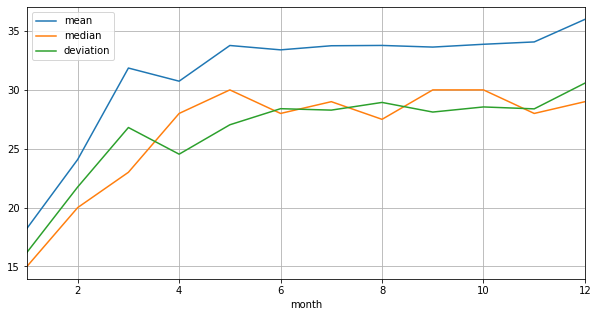

In [48]:
smart.plot(grid=True,figsize=(10,5))

## Вывод.
<b>По графику видно, что среднее и медана за год выросли и имеют тенденцию к росту дальше. 
Но наблюдается так же большое стандартное отклонение.</b>

## Посмотрим метрики пользователей тарифа "Смарт" по интернет траффику в месяц.

In [49]:
mean_smart = data.query('tariff == "smart"').pivot_table(index='month', values='mb_used', aggfunc='mean')
mean_smart.rename(columns={'mb_used': 'mean'}, inplace=True)

median_smart = data.query('tariff == "smart"').pivot_table(index='month', values='mb_used', aggfunc='median')
median_smart.rename(columns={'mb_used': 'median'}, inplace=True)
mean_smart = mean_smart.merge(median_smart, on='month', how='left')


devation_smart = data.query('tariff == "smart"').pivot_table(index='month', values='mb_used', aggfunc=np.std)
devation_smart.rename(columns={'mb_used': 'deviation'}, inplace=True)
smart = mean_smart.merge(devation_smart, on='month', how='left')

smart

,mean,median,deviation
month,,,
1,8513.176471,7096.0,6444.688602
2,11596.517241,12553.5,6247.328777
3,15103.675325,15670.0,5828.243609
4,13461.660714,14087.0,5698.201013
5,15804.666667,16323.0,5978.264732
6,15794.152439,16077.0,5791.133143
7,15742.631841,15925.0,5897.185941
8,16681.196581,16834.0,5498.382706
9,16303.103846,16028.0,5196.126464


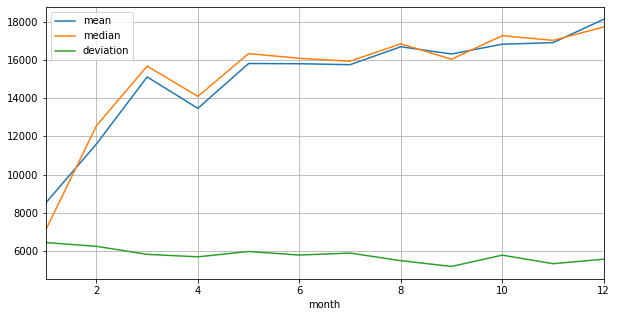

In [50]:
smart.plot(grid=True,figsize=(10,5))

## Вывод.
<b>По графику видно, что среднее и медана за год выросли и имеют тенденцию к росту дальше.</b>

## Шаг 4. Проверка гипотез.

### Первая гипотеза.
<b>Средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.</b>

Формируем наши датасеты. Проводим срезы по тарифу.

In [61]:
sample_ultra = data.query('tariff == "ultra"').loc[:,'revenu']
sample_smart = data.query('tariff == "smart"').loc[:,'revenu']

Задаем урвоень критической важности, если р-value окажется меньше него - отвергаем гипотезу.

In [62]:
alpha = .05

Проверяем гипотезу о равенстве средних двух независимых совокупностей.

## Наша гипотеза - средняя выручка пользователей тарифов "Ультра" и "Смарт" равна.

In [63]:
results = st.ttest_ind(
    sample_ultra, 
    sample_smart)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.986961942507112e-177
Отвергаем нулевую гипотезу


## Вывод

In [64]:
print('Средний чек пользователей разных тарифов отличается и с вероятностью {:%} это будет случайно.'.format(results.pvalue))

Средний чек пользователей разных тарифов отличается и с вероятностью 0.000000% это будет случайно.


<font color='magenta'> <b>Комментарий наставника:</b> Добавь, пожалуйста, формулировку самих гипотез.</font>

### Вторая гипотеза.
<b>Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.</b>

Формируем наши датасеты. Проводим срезы по городу.

In [65]:
sample_Moscow = data.query('city == "Москва"').loc[:,'revenu']
sample_Russia = data.query('city != "Москва"').loc[:,'revenu']

Задаем урвоень критической важности, если р-value окажется меньше него - отвергаем гипотезу.

In [66]:
alpha = .05

Проверяем гипотезу о равенстве средних двух независимых совокупностей.

## Наша гипотеза - средняя выручка пользователей Москвы равна средней выручке пользователей из других регионов

In [67]:
results = st.ttest_ind(
    sample_Moscow, 
    sample_Russia)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.46291765750778235
Не получилось отвергнуть нулевую гипотезу


## Вывод

In [68]:
print('Средняя выручка с пользователей Москвы равна средней выручке пользователей других городов, с вероятностью в {:%} это будет случайно.'.format(results.pvalue))

Средняя выручка с пользователей Москвы равна средней выручке пользователей других городов, с вероятностью в 46.291766% это будет случайно.


<font color='magenta'> <b>Комментарий наставника: </b> Чуть побольше стоит сделать вывод. И, главное - какой тариф все-таки выгодней для сотового оператора? </font>

## Так как средняя выручка пользователей тарифов "Ультра" и "Смарт" не равна, посмотрим какая из них выше и решим, что выгоднй для оператора.

In [59]:
revenu_smart = data.query('tariff == "smart"').pivot_table(index='month', values='revenu', aggfunc='mean')
revenu_smart.rename(columns={'revenu': 'smart'}, inplace=True)

revenu_ultra = data.query('tariff == "ultra"').pivot_table(index='month', values='revenu', aggfunc='mean')
revenu_ultra.rename(columns={'revenu': 'ultra'}, inplace=True)

revenu = revenu_smart.merge(revenu_ultra, on='month', how='left')

revenu

,smart,ultra
month,,
1,719.205882,1950.000000
2,810.741379,1977.272727
3,1134.077922,2014.864865
4,939.142857,2001.818182
5,1171.936170,2063.076923
6,1175.810976,2040.361446
7,1192.099502,2120.000000
8,1291.786325,2084.433962
9,1215.250000,2025.000000


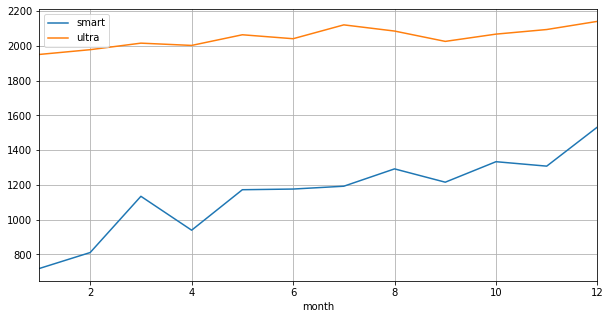

In [60]:
revenu.plot(grid=True,figsize=(10,5))

# Вывод
Для оператора выгоднее тариф Ультра, он приносит больше денег, но роста выручки с него нет. Тогда как тариф Смарт используют больше людей и выручка с него растет.